# Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [11]:
#in Colab
!gdown --id 1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA
filename = '/content/web_sites_data.csv'

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA
To: /content/web_sites_data.csv
100% 3.46G/3.46G [00:17<00:00, 200MB/s]


In [1]:
#in Jupyter
filename = 'web_sites_data.csv'

In [12]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
import itertools

/home/marykorol/.local/lib/python3.8/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/home/marykorol/.local/lib/python3.8/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance:

In [5]:
data = pd.read_csv(filename)

#### Data processing

In [39]:
text = data.loc[50684][0]
text

'<HTML><HEAD><TITLE>Quote for CBE - FreeRealTime.com</TITLE>\n<SCRIPT LANGUAGE="JavaScript">\nfunction customOnLoad() {if(document.formQuoteBox!=null) document.formQuoteBox.symbol.focus();if(document.pageSpecificForm!=null) window.open(document.pageSpecificForm.formCustom.value);}\n</SCRIPT>\n  <SCRIPT language="JavaScript"><!--\n    function checkForMultiple (t) {\n      var str = t.value;\n      var x = t.form.elements["type"];\n      var rtquote = 0;\n      var multiple = 0;\n      for (i=0; i<x.options.length; i++) {\n        if (x.options[i].value == "RT Quote") rtquote = i;\n        else if (x.options[i].value == "Multiple") multiple = i;\n      }\n      if ((str.indexOf(" ") >= 0) || (str.indexOf(",") >= 0)) {\n\tx.selectedIndex = multiple;\n      } else if (x.selectedIndex == multiple) {\n\t  x.selectedIndex = rtquote;\n      }\n    }\n\n    function lnoffwin(url,title) {\n       window.open(url,title, "width=640,height=600,left=0,top=0,screenX=0,screenY=0,toolbar=yes,location=

In [40]:
len(text)

37839

In [42]:
!pip install bs4

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=2164e36c2819f289e19fed75aa1074e3d33679901a3eab9a81bc0b49b60bbd6b
  Stored in directory: /home/marykorol/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [43]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(text, 'html.parser') # 'html.parser'

def parser(text):
    x = soup.get_text()
    return x

parser(text)

"Quote for CBE - FreeRealTime.com\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nforgot your login? -\n\nmy member info -\n\nhelp -\n\nsite map - \ntell a friend -\nabout us -\n\ncontact us -\n\nour services\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nRT Quote\nProfile\nNews\nOptions\nChart\nMsgBoard\nSEC Filings\nTime&Sales\nMulti Quotes\n\n\n\n\n\n\n\n\n Home \n\xa0|\xa0\n Markets \n\xa0|\xa0\n News \n\xa0|\xa0\n Insight \n\xa0|\xa0\n Community \n\xa0|\xa0\n Tools \n\xa0|\xa0\n Research \n\xa0|\xa0\n Forex \n\n\n\nSponsored by:\n\n\n\n\n 4:26:50 AM EDT - Saturday, June 13, 2009Markets are closed for the weekend.\n\n\n\n\n\n\n\n\n\nMarkets\n\n\nWatchList\n\nDow 30\n\nETF Center\n\n\nMore CBE\n\n\nQuote\n\nTime&Sales\n\nOptions\n\nNews\n\nChart\n\nProfile\n\nMessageBoard\n\nConference Calls\n\nSEC Filings\n\nMost Actives\n\nPercent Gainers\n\nPercent Losers\n\nDollar Gainers\n\nDollar Losers\n\nADR Center\n\n\n\n\n\n\n\n\xa0\xa0View\xa0WatchList\xa0\xa0\n\xa0Edit\xa0Watchlist\xa0\xa0\n\xa0\xa0Symbol\xa0

In [44]:
# Removing html-tags
def text_without_tags(text):
    x = soup.get_text()
    return x

text_without_tags(text)

"Quote for CBE - FreeRealTime.com\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nforgot your login? -\n\nmy member info -\n\nhelp -\n\nsite map - \ntell a friend -\nabout us -\n\ncontact us -\n\nour services\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nRT Quote\nProfile\nNews\nOptions\nChart\nMsgBoard\nSEC Filings\nTime&Sales\nMulti Quotes\n\n\n\n\n\n\n\n\n Home \n\xa0|\xa0\n Markets \n\xa0|\xa0\n News \n\xa0|\xa0\n Insight \n\xa0|\xa0\n Community \n\xa0|\xa0\n Tools \n\xa0|\xa0\n Research \n\xa0|\xa0\n Forex \n\n\n\nSponsored by:\n\n\n\n\n 4:26:50 AM EDT - Saturday, June 13, 2009Markets are closed for the weekend.\n\n\n\n\n\n\n\n\n\nMarkets\n\n\nWatchList\n\nDow 30\n\nETF Center\n\n\nMore CBE\n\n\nQuote\n\nTime&Sales\n\nOptions\n\nNews\n\nChart\n\nProfile\n\nMessageBoard\n\nConference Calls\n\nSEC Filings\n\nMost Actives\n\nPercent Gainers\n\nPercent Losers\n\nDollar Gainers\n\nDollar Losers\n\nADR Center\n\n\n\n\n\n\n\n\xa0\xa0View\xa0WatchList\xa0\xa0\n\xa0Edit\xa0Watchlist\xa0\xa0\n\xa0\xa0Symbol\xa0

In [45]:
# Removing html-tags
def text_without_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()
text_without_tags(text)

"Quote for CBE - FreeRealTime.com\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nforgot your login? -\n\nmy member info -\n\nhelp -\n\nsite map - \ntell a friend -\nabout us -\n\ncontact us -\n\nour services\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nRT Quote\nProfile\nNews\nOptions\nChart\nMsgBoard\nSEC Filings\nTime&Sales\nMulti Quotes\n\n\n\n\n\n\n\n\n Home \n\xa0|\xa0\n Markets \n\xa0|\xa0\n News \n\xa0|\xa0\n Insight \n\xa0|\xa0\n Community \n\xa0|\xa0\n Tools \n\xa0|\xa0\n Research \n\xa0|\xa0\n Forex \n\n\n\nSponsored by:\n\n\n\n\n 4:26:50 AM EDT - Saturday, June 13, 2009Markets are closed for the weekend.\n\n\n\n\n\n\n\n\n\nMarkets\n\n\nWatchList\n\nDow 30\n\nETF Center\n\n\nMore CBE\n\n\nQuote\n\nTime&Sales\n\nOptions\n\nNews\n\nChart\n\nProfile\n\nMessageBoard\n\nConference Calls\n\nSEC Filings\n\nMost Actives\n\nPercent Gainers\n\nPercent Losers\n\nDollar Gainers\n\nDollar Losers\n\nADR Center\n\n\n\n\n\n\n\n\xa0\xa0View\xa0WatchList\xa0\xa0\n\xa0Edit\xa0Watchlist\xa0\xa0\n\xa0\xa0Symbol\xa0

In [46]:
# Removing other html attributes

def remove_attrs(text):
    result = re.sub(r'\/.*?\ ', ' ', text)
    result = re.sub(r'\\\'.*?\' ', ' ', result)
    result = re.sub(r"https?://\S+", " ", result )
    result = re.sub(r"http?://\S+", " ", result)
    result = re.sub("\n", " ", result)
    result = re.sub('\t', " ", result)
    result = re.sub(r'\$.*?\ ', ' ', result)
    result = re.sub(r'\&.*?\ ', ' ', result)
    
    return result
    

remove_attrs(text_without_tags(text))

"Quote for CBE - FreeRealTime.com                forgot your login? -  my member info -  help -  site map -  tell a friend - about us -  contact us -  our services                      RT Quote Profile News Options Chart MsgBoard SEC Filings Time Multi Quotes          Home  \xa0|\xa0  Markets  \xa0|\xa0  News  \xa0|\xa0  Insight  \xa0|\xa0  Community  \xa0|\xa0  Tools  \xa0|\xa0  Research  \xa0|\xa0  Forex     Sponsored by:      4:26:50 AM EDT - Saturday, June 13, 2009Markets are closed for the weekend.          Markets   WatchList  Dow 30  ETF Center   More CBE   Quote  Time  Options  News  Chart  Profile  MessageBoard  Conference Calls  SEC Filings  Most Actives  Percent Gainers  Percent Losers  Dollar Gainers  Dollar Losers  ADR Center        \xa0\xa0View\xa0WatchList\xa0\xa0 \xa0Edit\xa0Watchlist\xa0\xa0 \xa0\xa0Symbol\xa0Search\xa0\xa0 \xa0Portfolio\xa0Tracker       Already a member?  Click here to login and retrieve your watchlist. Otherwise, click here to register. Member Benefi

In [47]:
# Removing non-english words
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize(text):
    return word_tokenize(text)
nltk.download('words')
words = set(nltk.corpus.words.words())
def english(tokens):
    return list([w.lower() for w in tokens 
         if w.lower() in words or w.isalpha()])



[nltk_data] Downloading package punkt to /home/marykorol/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /home/marykorol/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [48]:
# Lemmatization
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens if len(word) > 2]
    

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/marykorol/nltk_data...


In [49]:
# Removing stop-words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def exclude_stopwords(tokens):
    return list([w for w in tokens if not w in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marykorol/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/marykorol/nltk_data...


True

In [51]:
clean_text = exclude_stopwords(lemmatize(english(tokenize(text_without_tags(text)))))
clean_text

['quote',
 'cbe',
 'forgot',
 'login',
 'member',
 'info',
 'help',
 'site',
 'map',
 'tell',
 'friend',
 'contact',
 'service',
 'quote',
 'profile',
 'news',
 'option',
 'chart',
 'msgboard',
 'sec',
 'filing',
 'time',
 'sale',
 'multi',
 'quote',
 'home',
 'market',
 'news',
 'insight',
 'community',
 'tool',
 'research',
 'forex',
 'sponsored',
 'edt',
 'saturday',
 'june',
 'closed',
 'weekend',
 'market',
 'watchlist',
 'dow',
 'etf',
 'center',
 'cbe',
 'quote',
 'time',
 'sale',
 'option',
 'news',
 'chart',
 'profile',
 'messageboard',
 'conference',
 'call',
 'sec',
 'filing',
 'active',
 'percent',
 'gainer',
 'percent',
 'loser',
 'dollar',
 'gainer',
 'dollar',
 'loser',
 'adr',
 'center',
 'view',
 'watchlist',
 'edit',
 'watchlist',
 'symbol',
 'search',
 'portfolio',
 'tracker',
 'already',
 'member',
 'click',
 'login',
 'retrieve',
 'watchlist',
 'otherwise',
 'click',
 'register',
 'member',
 'benefit',
 'djia',
 'nasdaq',
 'russell',
 'cboe',
 'volatility',
 'bond'

In [52]:
sample_texts = data[:1000]

In [53]:
little_sample = data[:100]

In [54]:
# Getting all the words in one array
def get_all_the_words(texts):
    result = []
    for i in range(len(texts)):
        text = texts.loc[i][0]
        one = lemmatize(english(tokenize(remove_attrs(text_without_tags(text)))))
        clean_text = exclude_stopwords(one)
        for j in clean_text:
            result.append(j)
    return result

all_the_words_sample = get_all_the_words(little_sample) # A sample to test


In [ ]:
# All the words from all the documents
all_the_words = get_all_the_words(data)

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [55]:
import matplotlib.pyplot as plt

In [56]:
def show_top_100(words):
    sample_data = pd.DataFrame(data = words, columns=['Words'])
    sample_data['Counts'] = sample_data.groupby(['Words'])['Words'].transform('count')
    sample_data['Counts'] = sample_data['Counts'].copy()
    sample_data = sample_data.drop_duplicates().reset_index(drop = True)
    for_bar = sample_data.sort_values(['Counts'], ascending=False).head(100)
    
    x = for_bar['Words'].to_numpy()
    y = for_bar['Counts'].to_numpy()

    fig, ax = plt.subplots()

    ax.bar(x, y)

    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(100)    
    fig.set_figheight(20)    

    plt.show()

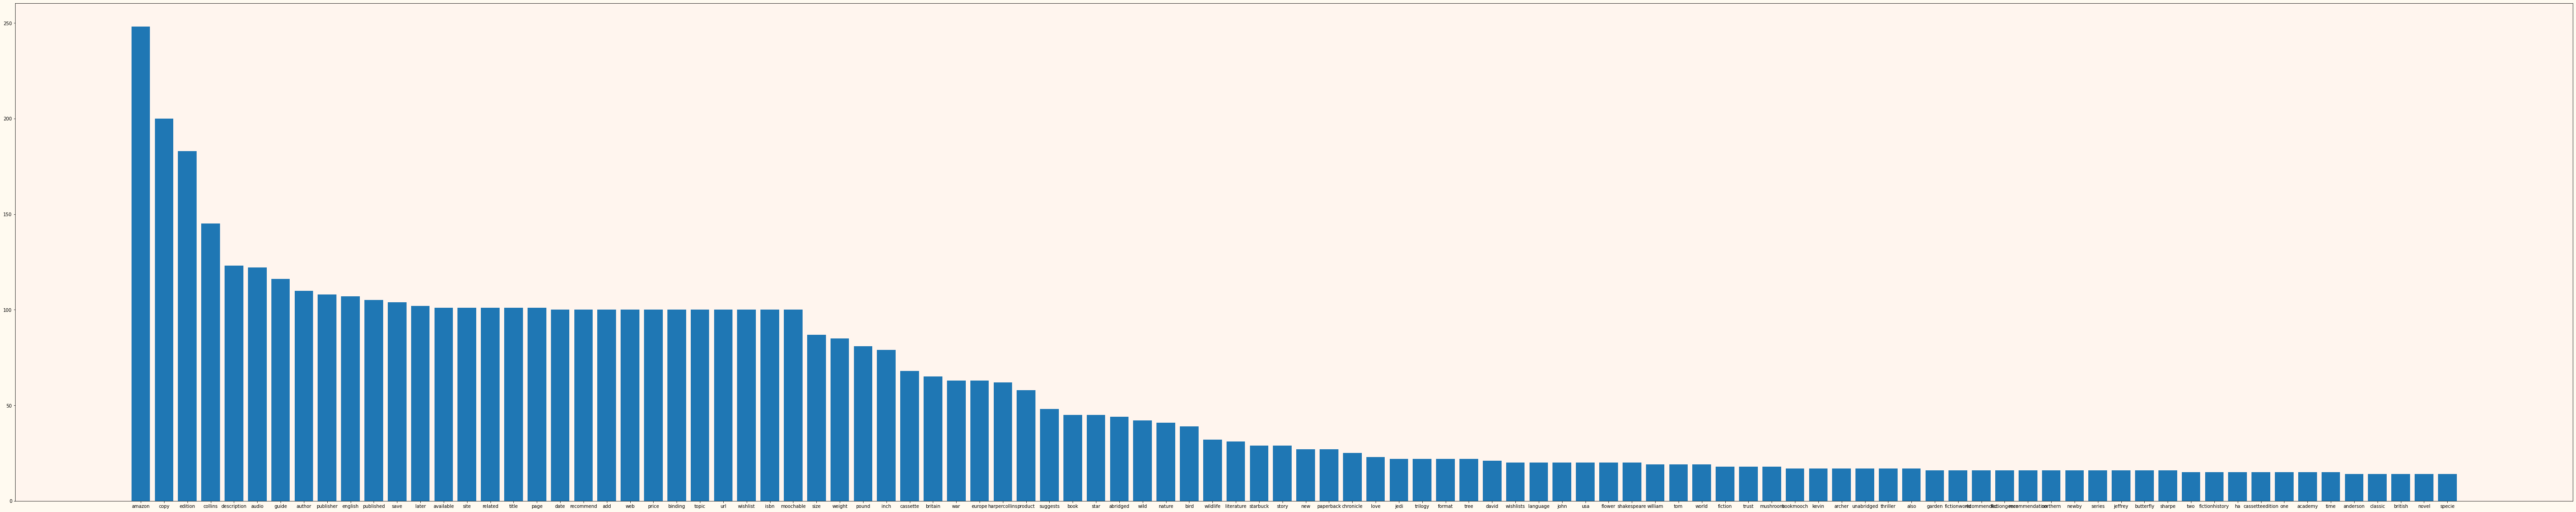

In [57]:
# With sample it is faster

show_top_100(all_the_words_sample)

In [58]:
# Final answer

show_top_100(all_the_words)

NameError: name 'all_the_words' is not defined

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [59]:
example_1 = exclude_stopwords(lemmatize(english(tokenize(text_without_tags(data.loc[10][0])))))
example_1

['kevin',
 'ground',
 'zero',
 'kevin',
 'ground',
 'zero',
 'author',
 'kevin',
 'title',
 'ground',
 'zero',
 'moochable',
 'copy',
 'copy',
 'available',
 'amazon',
 'suggests',
 'skinthe',
 'antibodiesthe',
 'goblinsthe',
 'whirlwind',
 'recommended',
 'phil',
 'mcgraw',
 'ultimate',
 'weight',
 'solution',
 'food',
 'guidekevin',
 'anderson',
 'ground',
 'zerophillip',
 'mcgraw',
 'phil',
 'mcgraw',
 'relationship',
 'rescuejohn',
 'knowles',
 'separate',
 'peacelee',
 'iacocca',
 'iacocca',
 'autobiographynathaniel',
 'hawthorne',
 'scarlet',
 'letter',
 'classic',
 'robert',
 'atkins',
 'atkins',
 'new',
 'carbohydrate',
 'gram',
 'counterlouis',
 'haunted',
 'mesanigel',
 'slater',
 'toasttim',
 'lahaye',
 'left',
 'behind',
 'novel',
 'earth',
 'recommendation',
 'topic',
 'activity',
 'booksages',
 'cassettesaudiobooksauthors',
 'illustratorsbooks',
 'cassettecharacters',
 'serieschildren',
 'bookschristmas',
 'booksclassicscomics',
 'graphic',
 'novelscrime',
 'thriller',
 '

In [60]:
example_2 = exclude_stopwords(lemmatize(english(tokenize(text_without_tags(data.loc[479][0])))))
example_2

['kevin',
 'ground',
 'zero',
 'kevin',
 'ground',
 'zero',
 'author',
 'kevin',
 'title',
 'ground',
 'zero',
 'moochable',
 'copy',
 'copy',
 'available',
 'amazon',
 'suggests',
 'skinthe',
 'antibodiesthe',
 'goblinsthe',
 'whirlwind',
 'recommended',
 'phil',
 'mcgraw',
 'ultimate',
 'weight',
 'solution',
 'food',
 'guidekevin',
 'anderson',
 'ground',
 'zerophillip',
 'mcgraw',
 'phil',
 'mcgraw',
 'relationship',
 'rescuejohn',
 'knowles',
 'separate',
 'peacelee',
 'iacocca',
 'iacocca',
 'autobiographynathaniel',
 'hawthorne',
 'scarlet',
 'letter',
 'classic',
 'robert',
 'atkins',
 'atkins',
 'new',
 'carbohydrate',
 'gram',
 'counterlouis',
 'haunted',
 'mesanigel',
 'slater',
 'toasttim',
 'lahaye',
 'left',
 'behind',
 'novel',
 'earth',
 'recommendation',
 'topic',
 'activity',
 'booksages',
 'cassettesaudiobooksauthors',
 'illustratorsbooks',
 'cassettecharacters',
 'serieschildren',
 'bookschristmas',
 'booksclassicscomics',
 'graphic',
 'novelscrime',
 'thriller',
 '

# Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [ ]:
!sudo pip install git+https://github.com/ekzhu/datasketch.git


  Cloning https://github.com/ekzhu/datasketch.git to /tmp/pip-req-build-7ag_nuae
  Running command git clone -q https://github.com/ekzhu/datasketch.git /tmp/pip-req-build-7ag_nuae
  Created wheel for datasketch: filename=datasketch-1.5.3-py3-none-any.whl size=67438 sha256=2c6e6c5e18e2193d3724ee0ecb741be8776cdc28efc6bb89f5c7cee6b3730ef9
  Stored in directory: /tmp/pip-ephem-wheel-cache-8yv5kuwx/wheels/b4/69/b1/e4563b7612146670c5cd952bdc5938926f2833ab7f5b05120d
Successfully built datasketch


In [ ]:
from datasketch import MinHash, MinHashLSH

def count_the_duplicates(texts, num_perm=128):
    def get_all_the_clean_texts(texts):
        result = []
        for i in range(len(texts)):
            text = texts.loc[i][0]
            one = lemmatize(english(tokenize(remove_attrs(text_without_tags(text)))))
            clean_text = exclude_stopwords(one)
            result.append(set(clean_text))
        return result

    sample_sets = get_all_the_clean_texts(texts)

    def find_LSH(sets):
        m = {}
    
        for i in range(len(sets)):
            m_i = MinHash(num_perm)
            for d in sets[i]:
                m_i.update(d.encode('utf8'))
            m['m{}'.format(i)] = m_i
        return m

    data_list = find_LSH(sample_sets)

    lsh = MinHashLSH(threshold=0.9, num_perm=num_perm)

    duplicates = []
    with lsh.insertion_session() as session:
        for key in data_list.keys():
            session.insert(key, data_list[key])
  
            result = lsh.query(data_list[key])
            if len(result) > 1:
                duplicates.append(sorted(result))
                # print("Approximate neighbours with Jaccard similarity > 0.9", sorted(result))

    return len(duplicates)

In [ ]:
count_the_duplicates(sample_texts)

527

In [ ]:
# Final answer
count_the_duplicates(data)

#  a plot dependency of duplicates on minhash length (with fixed shingle size)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.subplots()

x = list(range(50, 250, 10))
y = []
for i in x:
    y.append(count_the_duplicates(sample_texts, num_perm=i))

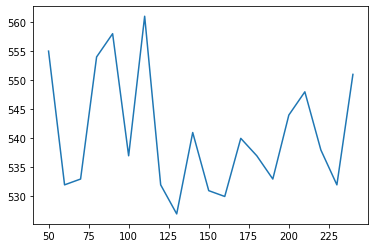

In [ ]:
#  a plot dependency of duplicates on minhash length (with fixed shingle size)

fig = plt.subplots()
plt.plot(x, y)

plt.show()

In [ ]:
def devide_into_shingles(texts):
        result = []
        for i in range(len(texts)):
            text = texts.loc[i][0]
            one = remove_attrs(text_without_tags(text))
            
            result.append(one)
        return result

devide_into_shingles(texts_sample)

# [Optional 15 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

In [1]:
# in Google Colab
!gdown --id 14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH
filename_opt = '/content/data.csv'

/bin/bash: gdown: command not found


In [5]:
# in Jupyter
import urllib.request
url = 'https://drive.google.com/u/0/uc?id=14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH&export=download'
filename = 'stories.csv'
urllib.request.urlretrieve(url, filename)

('stories.csv', <http.client.HTTPMessage at 0x7fe712defaf0>)

#### Preprocess dataset with the functions from the Part 1

In [6]:
data_opt = pd.read_csv(filename)

In [7]:
data_opt.author.unique()

array(['EAP', 'HPL', 'MWS'], dtype=object)

In [8]:
len(data_opt)

19579

In [41]:
sample = data_opt[:1000]

In [42]:
texts = sample.text.tolist()

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# making a tfidf matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(texts)
words = np.array(vectorizer.get_feature_names())

In [44]:
# making a counter matrix
cnt_vectorizer = CountVectorizer(stop_words='english')
cnt = cnt_vectorizer.fit_transform(texts)
cnt_words = cnt_vectorizer.get_feature_names()

In [45]:
from gensim.models import Word2Vec
import gensim.downloader as api

# word2vec
corpus = api.load('glove-wiki-gigaword-300')

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

In [46]:
# coherence

import itertools
from math import log

def tfidf_1(word, docs):
    counter = 0
    for doc in docs:
        counter+=doc[word]
    return counter

def tfidf_2(word1, word2, docs):
    counter = 0
    for doc in docs:
        counter+=doc[word1]*doc[word2]
    return counter


def tfidf_coherence(key_words, docs):
    '''
    key_words - top words of the topic (vectors)
    '''
    results1 = []
    results2 = []
    for word1, word2 in itertools.permutations(key_words,2):
        result = tfidf_2(word1, word2, docs)
        results1.append(result)
        result = tfidf_1(word1, docs)
        results2.append(result)
    return log((sum(results1) + 1)/sum(results2))

In [47]:
# normalized PMI

def p_1(word, docs):
    counter = 0
    for doc in docs:
        counter+=doc[word]
    return counter/len(docs)
    
    
def p_2(word1, word2, docs):
    counter = 0
    for doc in docs:
        if doc[word1] and doc[word2]:
            counter+=1
    return counter/len(docs)

def norm_pmi(key_words, docs):
    results = []

    for word1, word2 in itertools.permutations(key_words,2):
        if p_2(word1, word2, docs)!= 0:
            result = log(p_2(word1, word2, docs)/(p_1(word1, docs)*p_1(word2, docs)))/-log(p_2(word1, word2, docs))
        else:
            result = - 1
        results.append(result)
    return sum(results)

In [48]:
# based on the distributed word representation 

def Q(topic_words):
    distances = []
    W = len(topic_words)
    for word1, word2 in itertools.permutations(topic_words,2):
        try:
            distances.append(corpus.distance(word1, word2))
        except KeyError:
            W-=1
    
    return sum(distances)/(W*(W-1))
    
    

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train, test = train_test_split(texts)

In [57]:
def plot_tokens(df):
    cnt_vectorizer = CountVectorizer(max_features=1500, stop_words='english')
    cnt = cnt_vectorizer.fit_transform(df)
    cnt_words = cnt_vectorizer.get_feature_names()
    vocab = cnt_vectorizer.vocabulary_
    
    x = cnt_words
    y = [cnt.toarray()[:, vocab[word]].sum() for word in x]
    data = pd.DataFrame(data=list(zip(x,y)),
                        columns=['words', 'counts']).sort_values(['counts'], ascending=False).head(25)
    
    x = data.words.to_numpy()
    y = data.counts.to_numpy()
    fig, ax = plt.subplots()
    ax.bar(x, y)
    fig.set_figwidth(25) 
    fig.set_figheight(10)
    plt.xticks(rotation=45, size=20)
    plt.yticks(size=20)
    plt.show()


Plot the histogram of resulting tokens counts in the processed datasets.

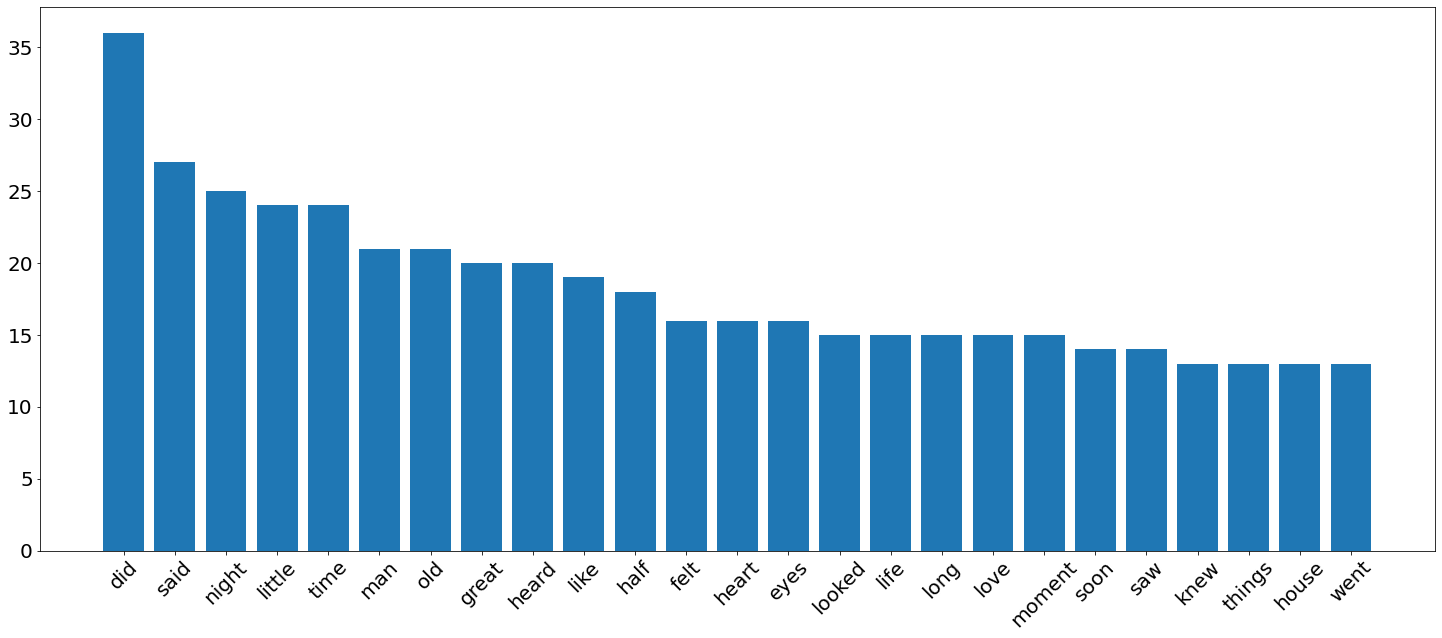

In [58]:
plot_tokens(train)

Plot the histogram of resulting tokens counts in the processed datasets.

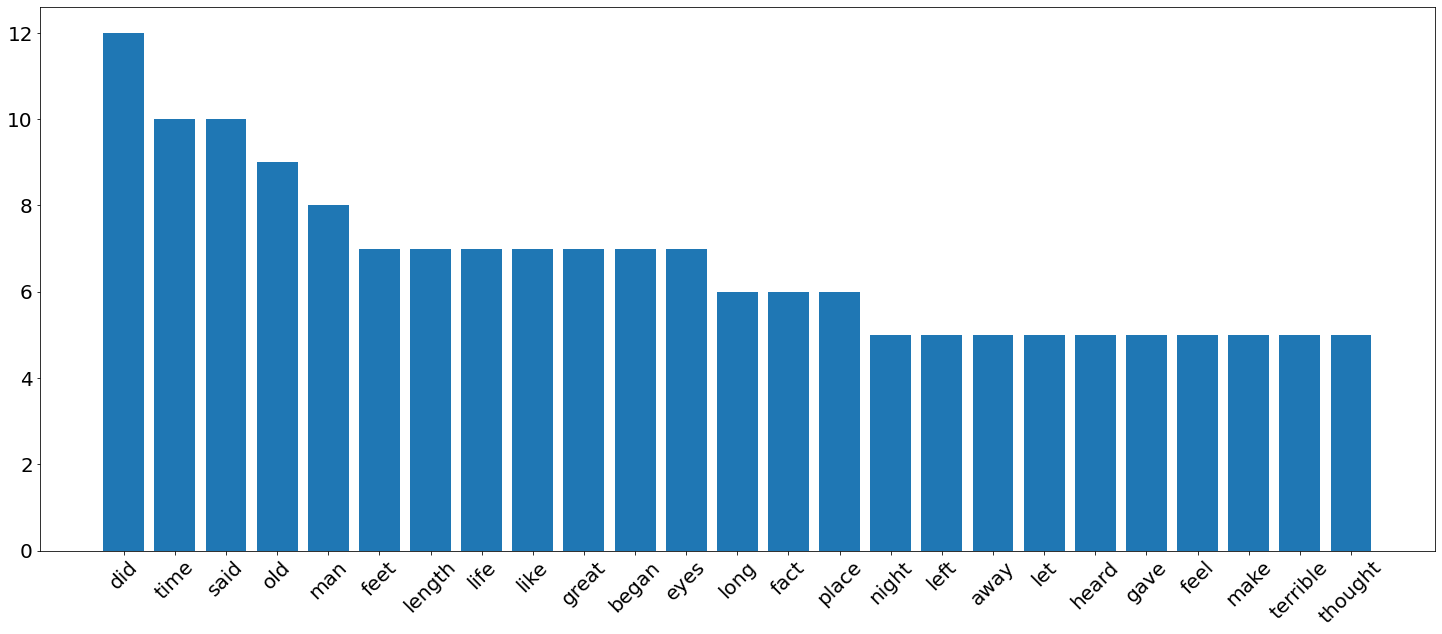

In [59]:
plot_tokens(test)

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [60]:
from sklearn.decomposition import NMF

In [66]:
# Non-negative matrix factorization relies on linear algebra
nmf = NMF(n_components=300, solver='mu')
W = nmf.fit_transform(tfidf)
H = nmf.components_

In [67]:
for i, topic in enumerate(H[:10]):
    print('Topic {}: {}'.format(i+1, ', '.join([str(x) for x in words[topic.argsort()[-5:]]])))

Topic 1: intellectually, half, believed, sorrow, felt
Topic 2: fourth, dream, ass, daemon, said
Topic 3: spellbound, carving, proceed, stairs, did
Topic 4: dupin, desperate, old, immortality, man
Topic 5: fell, change, cognizant, dream, things
Topic 6: persons, calm, fresh, approximately, night
Topic 7: ring, reached, bolt, space, time
Topic 8: desires, limit, sorrow, wherefore, feel
Topic 9: degree, uneducated, grandmother, tension, great
Topic 10: known, care, external, familiar, world


#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [69]:
# Latent Dirihlet Allocation is based on probabilistic graphical modeling

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=300)
W2 = lda.fit_transform(tfidf)

In [72]:
for i, topic in enumerate(lda.components_[:10]):
    print('Topic {}: {}'.format(i+1, ', '.join([str(words[idx]) for idx in topic.argsort()[-5:]])))

Topic 1: fatality, fatal, fat, fatigued, ærostation
Topic 2: fatality, fatal, fat, fatigued, ærostation
Topic 3: fatality, fatal, fat, fatigued, ærostation
Topic 4: fatality, fatal, fat, fatigued, ærostation
Topic 5: fatality, fatal, fat, fatigued, ærostation
Topic 6: fatality, fatal, fat, fatigued, ærostation
Topic 7: fatality, fatal, fat, fatigued, ærostation
Topic 8: fatality, fatal, fat, fatigued, ærostation
Topic 9: fatality, fatal, fat, fatigued, ærostation
Topic 10: fatality, fatal, fat, fatigued, ærostation


### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

In [130]:
!pip install bigartm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.3 MB/s eta 0:00:0000:0100:01


In [73]:
voc = vectorizer.vocabulary_
vocabulary = {x:y for x, y in zip(voc.values(), voc.keys())}

In [74]:
# Additive regularization for topic models
from artm import ARTM, BatchVectorizer, TopTokensScore

batch_vectorizer = BatchVectorizer(data_format='bow_n_wd',
                                   n_wd = tfidf.toarray(),
                                   vocabulary=vocabulary
                                  )

In [75]:
topic_names = ['Topic {}'.format(i+1) for i in range(300)]

artm = ARTM(topic_names=topic_names)
artm.initialize(batch_vectorizer.dictionary)
artm.scores.add(TopTokensScore(name='TopTokensScore', num_tokens=5))
artm.fit_offline(batch_vectorizer)


In [76]:
for topic_name in artm.topic_names[:10]:
    print(topic_name + ': ' + ', '.join(str(x) for x in artm.score_tracker['TopTokensScore'].last_tokens[topic_name]))

Topic 1: abysms, colonial, contrary, asleep, airship
Topic 2: abysms, arranged, bargemen, carcass, akin
Topic 3: abysms, arkham, conversation, anomalousness, breathless
Topic 4: admit, chaise, antediluvian, appertain, brighter
Topic 5: brick, characteristic, analogy, arter, abaout
Topic 6: cloak, confidence, black, blueberry, appear
Topic 7: azure, awoke, caused, affliction, bodies
Topic 8: best, benevolent, complexion, chanting, bruise
Topic 9: anew, confidence, ate, boys, capital
Topic 10: cherub, bates, anglican, alleys, blueberry


Calculate the quality scores for each model. Make a barplot to compare the quality.

#### tfidf coherence

In [78]:
nmf_tfidf=[]
print('NMF')
for i, topic in enumerate(nmf.components_):
    score=tfidf_coherence(topic.argsort()[-5:], tfidf.toarray())
    print('Topic {} coherence: {}'.format(i+1, score))
    nmf_tfidf.append(score)

NMF
Topic 1 coherence: -2.483887286338704
Topic 2 coherence: -2.543541774816555
Topic 3 coherence: -2.592457160337391
Topic 4 coherence: -2.7884456098773023
Topic 5 coherence: -2.365822656530519
Topic 6 coherence: -2.4628396568479545
Topic 7 coherence: -2.673506528682112
Topic 8 coherence: -1.975073356460389
Topic 9 coherence: -2.185961488484253
Topic 10 coherence: -2.2389537052774178
Topic 11 coherence: -2.2180805591830497
Topic 12 coherence: -2.424647919110545
Topic 13 coherence: -1.924950355231203
Topic 14 coherence: -2.3199819526081433
Topic 15 coherence: -2.6120597601122446
Topic 16 coherence: -2.542466911645955
Topic 17 coherence: -2.223495103525256
Topic 18 coherence: -2.4228801699313456
Topic 19 coherence: -1.8173447392953976
Topic 20 coherence: -1.6509178530093724
Topic 21 coherence: -2.118389781879728
Topic 22 coherence: -2.1860238550854674
Topic 23 coherence: -1.885098908496038
Topic 24 coherence: -2.367051294564851
Topic 25 coherence: -1.9639474623739606
Topic 26 coherence:

Topic 208 coherence: -1.403961660454962
Topic 209 coherence: -1.2658713258280794
Topic 210 coherence: -1.5878612479571066
Topic 211 coherence: -1.4724382568481174
Topic 212 coherence: -2.194416569869864
Topic 213 coherence: -2.4531292540690304
Topic 214 coherence: -1.3320030053359921
Topic 215 coherence: -1.3872637088817987
Topic 216 coherence: -1.9844169772887028
Topic 217 coherence: -2.2113963821556726
Topic 218 coherence: -1.2936262670064544
Topic 219 coherence: -2.0843186414068704
Topic 220 coherence: -1.1601181700880274
Topic 221 coherence: -1.6236339574629595
Topic 222 coherence: -1.3953862477832837
Topic 223 coherence: -1.0882316394341878
Topic 224 coherence: -1.7777080630285735
Topic 225 coherence: -1.4010180263201988
Topic 226 coherence: -1.7154892268842945
Topic 227 coherence: -1.4230632738099862
Topic 228 coherence: -1.450171887275252
Topic 229 coherence: -1.38240524541091
Topic 230 coherence: -1.152673517476602
Topic 231 coherence: -1.1145409712035312
Topic 232 coherence: -

In [79]:
print('LDA')
lda_tfidf =[]
for i, topic in enumerate(lda.components_):
    print('Topic {} coherence: {}'.format(i+1, 
                                          tfidf_coherence(topic.argsort()[-5:], tfidf.toarray())))
    lda_tfidf.append(tfidf_coherence(topic.argsort()[-5:], tfidf.toarray()))

LDA
Topic 1 coherence: -1.6768294797034962
Topic 2 coherence: -1.6768294797034962
Topic 3 coherence: -1.6768294797034962
Topic 4 coherence: -1.6768294797034962
Topic 5 coherence: -1.6768294797034962
Topic 6 coherence: -1.6768294797034962
Topic 7 coherence: -1.6768294797034962
Topic 8 coherence: -1.6768294797034962
Topic 9 coherence: -1.6768294797034962
Topic 10 coherence: -1.6768294797034962
Topic 11 coherence: -1.6768294797034962
Topic 12 coherence: -1.6768294797034962
Topic 13 coherence: -1.6768294797034962
Topic 14 coherence: -1.6768294797034962
Topic 15 coherence: -1.6768294797034962
Topic 16 coherence: -1.6768294797034962
Topic 17 coherence: -1.6768294797034962
Topic 18 coherence: -1.6768294797034962
Topic 19 coherence: -1.6768294797034962
Topic 20 coherence: -1.6768294797034962
Topic 21 coherence: -1.6768294797034962
Topic 22 coherence: -1.6768294797034962
Topic 23 coherence: -1.6768294797034962
Topic 24 coherence: -1.6768294797034962
Topic 25 coherence: -1.6768294797034962
Topic

Topic 204 coherence: -1.6768294797034962
Topic 205 coherence: -1.6768294797034962
Topic 206 coherence: -1.6768294797034962
Topic 207 coherence: -1.6768294797034962
Topic 208 coherence: -1.6768294797034962
Topic 209 coherence: -1.6768294797034962
Topic 210 coherence: -1.6768294797034962
Topic 211 coherence: -1.6768294797034962
Topic 212 coherence: -1.6768294797034962
Topic 213 coherence: -1.6768294797034962
Topic 214 coherence: -3.3502364049481317
Topic 215 coherence: -1.6768294797034962
Topic 216 coherence: -1.6768294797034962
Topic 217 coherence: -1.6768294797034962
Topic 218 coherence: -1.6768294797034962
Topic 219 coherence: -1.6768294797034962
Topic 220 coherence: -1.6768294797034962
Topic 221 coherence: -1.6768294797034962
Topic 222 coherence: -1.6768294797034962
Topic 223 coherence: -1.6768294797034962
Topic 224 coherence: -1.6768294797034962
Topic 225 coherence: -1.6768294797034962
Topic 226 coherence: -1.6768294797034962
Topic 227 coherence: -1.6768294797034962
Topic 228 cohere

In [80]:
print('ARTM')
i=0
artm_tfidf=[]
for topic_name in artm.topic_names:
    topic_key_words = list([voc[x] for x in artm.score_tracker['TopTokensScore'].last_tokens[topic_name]])
    print('Topic {} coherence: {}'.format(i+1, 
                                          tfidf_coherence(topic_key_words, tfidf.toarray())))
    i+=1
    artm_tfidf.append(tfidf_coherence(topic_key_words, tfidf.toarray()))

ARTM
Topic 1 coherence: -1.9578854868721776
Topic 2 coherence: -1.766107653950073
Topic 3 coherence: -2.1185179646930936
Topic 4 coherence: -2.142376623597173
Topic 5 coherence: -2.0279649008758374
Topic 6 coherence: -2.979685422988665
Topic 7 coherence: -2.5010048338670203
Topic 8 coherence: -2.57978325549019
Topic 9 coherence: -2.4939333699280386
Topic 10 coherence: -2.045059146363737
Topic 11 coherence: -1.9702635190290505
Topic 12 coherence: -2.4939147317298924
Topic 13 coherence: -2.881716904863132
Topic 14 coherence: -1.929339090567286
Topic 15 coherence: -2.1071536917466793
Topic 16 coherence: -2.221370886309772
Topic 17 coherence: -1.8558939586149483
Topic 18 coherence: -2.423622757941043
Topic 19 coherence: -2.5252342533813366
Topic 20 coherence: -2.423955009948764
Topic 21 coherence: -1.8819115377579452
Topic 22 coherence: -2.6197275772469593
Topic 23 coherence: -2.0776849829325967
Topic 24 coherence: -2.6058152840826008
Topic 25 coherence: -2.972978216752703
Topic 26 coheren

Topic 207 coherence: -2.9483044368347286
Topic 208 coherence: -1.9922909916283618
Topic 209 coherence: -1.9177742280551702
Topic 210 coherence: -2.7546030019634182
Topic 211 coherence: -2.7340846210326535
Topic 212 coherence: -1.7474273951804589
Topic 213 coherence: -1.899112063503585
Topic 214 coherence: -1.5204465411501729
Topic 215 coherence: -2.4319818707165064
Topic 216 coherence: -1.7251958452953788
Topic 217 coherence: -2.1311518036226733
Topic 218 coherence: -1.9139633751434937
Topic 219 coherence: -2.3181130544785145
Topic 220 coherence: -2.5409582582156673
Topic 221 coherence: -2.8097632666561854
Topic 222 coherence: -2.9120717927925086
Topic 223 coherence: -2.501139193866818
Topic 224 coherence: -2.01239200926436
Topic 225 coherence: -1.6674140632231649
Topic 226 coherence: -1.8197954692938594
Topic 227 coherence: -2.7337733984347747
Topic 228 coherence: -1.939987545343003
Topic 229 coherence: -2.258696328099708
Topic 230 coherence: -2.678529758069849
Topic 231 coherence: -2

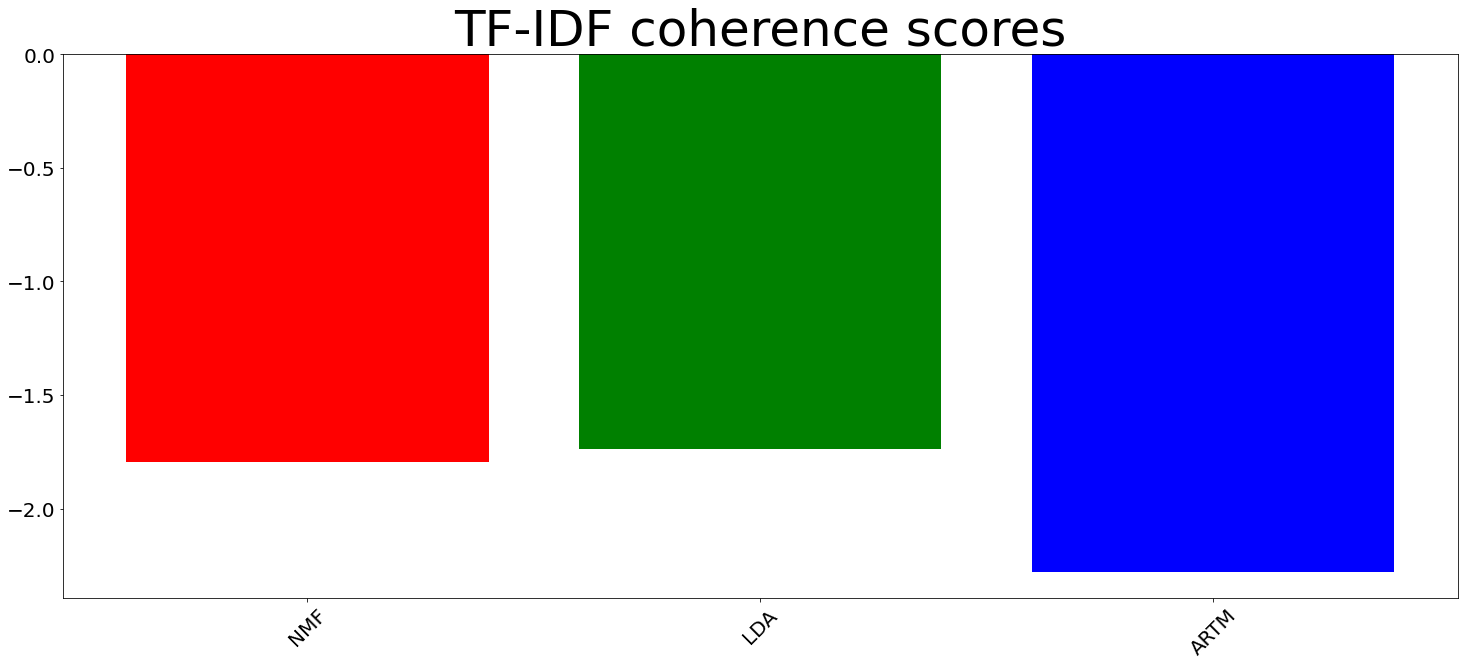

In [81]:
x = ['NMF', 'LDA', 'ARTM']
y = list(map(np.mean, map(np.array, [nmf_tfidf, lda_tfidf, artm_tfidf])))
fig, ax = plt.subplots()
ax.bar(x, y, color=['r', 'g', 'b'])
fig.set_figwidth(25) 
fig.set_figheight(10)
plt.xticks(rotation=45, size=20)
plt.yticks(size=20)
plt.title('TF-IDF coherence scores', size=50)
plt.show()

#### Normalized PMI

In [82]:
print('NMF')
nmf_pmi=np.array([])
for i, topic in enumerate(nmf.components_):
    print('Topic {} NPMI: {}'.format(i+1, 
                                          norm_pmi(topic.argsort()[-5:], cnt.toarray())))
    nmf_pmi = np.append(nmf_pmi, norm_pmi(topic.argsort()[-5:], cnt.toarray()))

NMF
Topic 1 NPMI: 1.0582899099588419
Topic 2 NPMI: -2.8931029381612525
Topic 3 NPMI: -1.2351932502065532
Topic 4 NPMI: -4.866759636232147
Topic 5 NPMI: -2.5409744532520646
Topic 6 NPMI: -2.3098583464306253
Topic 7 NPMI: -4.595493040325526
Topic 8 NPMI: -3.181131355398089
Topic 9 NPMI: -4.748531879190356
Topic 10 NPMI: -5.134847993348765
Topic 11 NPMI: 11.868751939546184
Topic 12 NPMI: -5.558671533606603
Topic 13 NPMI: -0.16218105925850101
Topic 14 NPMI: -4.568535751894925
Topic 15 NPMI: 3.392889645453942
Topic 16 NPMI: -1.5020121099242814
Topic 17 NPMI: -1.4453245061098063
Topic 18 NPMI: -2.1493574453989632
Topic 19 NPMI: 14.788686641495133
Topic 20 NPMI: 15.860202555761022
Topic 21 NPMI: -0.6579449009076535
Topic 22 NPMI: -1.0925741280549106
Topic 23 NPMI: -3.73830334880978
Topic 24 NPMI: -2.5257547502459166
Topic 25 NPMI: 1.764560366885278
Topic 26 NPMI: 1.5468719250764273
Topic 27 NPMI: 14.185396582023882
Topic 28 NPMI: -3.5139783290865485
Topic 29 NPMI: 4.248320969146991
Topic 30 N

Topic 244 NPMI: 13.875559492635917
Topic 245 NPMI: 4.6375175252488265
Topic 246 NPMI: 13.911196723457204
Topic 247 NPMI: 16.9436585715247
Topic 248 NPMI: 16.65260665305785
Topic 249 NPMI: 0.06358932045050047
Topic 250 NPMI: 13.47424524975408
Topic 251 NPMI: 16.31943668876905
Topic 252 NPMI: 15.516690033665101
Topic 253 NPMI: 0.7318111513675786
Topic 254 NPMI: 6.727676654080902
Topic 255 NPMI: 16.31943668876905
Topic 256 NPMI: 14.666666666666666
Topic 257 NPMI: 16.652606653057852
Topic 258 NPMI: 17.591760034688154
Topic 259 NPMI: 3.1972533448960507
Topic 260 NPMI: 4.193820026016113
Topic 261 NPMI: 1.993133362240127
Topic 262 NPMI: 14.713943378561149
Topic 263 NPMI: 4.1869533882562395
Topic 264 NPMI: 19.197253344896048
Topic 265 NPMI: 16.530586678229383
Topic 266 NPMI: 16.789013379584198
Topic 267 NPMI: -2.0068666377598734
Topic 268 NPMI: 16.061009987414234
Topic 269 NPMI: 20.0
Topic 270 NPMI: 13.921706224919015
Topic 271 NPMI: 15.047113342849949
Topic 272 NPMI: 13.572259866168551
Topic 

In [83]:
print('LDA')
lda_pmi=np.array([])
for i, topic in enumerate(lda.components_):
    print('Topic {} NPMI: {}'.format(i+1, 
                                          norm_pmi(topic.argsort()[-5:], cnt.toarray())))
    lda_pmi = np.append(lda_pmi, norm_pmi(topic.argsort()[-5:], cnt.toarray()))

LDA
Topic 1 NPMI: -20
Topic 2 NPMI: -20
Topic 3 NPMI: -20
Topic 4 NPMI: -20
Topic 5 NPMI: -20
Topic 6 NPMI: -20
Topic 7 NPMI: -20
Topic 8 NPMI: -20
Topic 9 NPMI: -20
Topic 10 NPMI: -20
Topic 11 NPMI: -20
Topic 12 NPMI: -20
Topic 13 NPMI: -20
Topic 14 NPMI: -20
Topic 15 NPMI: -20
Topic 16 NPMI: -20
Topic 17 NPMI: -20
Topic 18 NPMI: -20
Topic 19 NPMI: -20
Topic 20 NPMI: -20
Topic 21 NPMI: -20
Topic 22 NPMI: -20
Topic 23 NPMI: -20
Topic 24 NPMI: -20
Topic 25 NPMI: -20
Topic 26 NPMI: -20
Topic 27 NPMI: -20
Topic 28 NPMI: -20
Topic 29 NPMI: -20
Topic 30 NPMI: -20
Topic 31 NPMI: -20
Topic 32 NPMI: -20
Topic 33 NPMI: -20
Topic 34 NPMI: -20
Topic 35 NPMI: -20
Topic 36 NPMI: -20
Topic 37 NPMI: -20
Topic 38 NPMI: -20
Topic 39 NPMI: -20
Topic 40 NPMI: -20
Topic 41 NPMI: -20
Topic 42 NPMI: -20
Topic 43 NPMI: -20
Topic 44 NPMI: -20
Topic 45 NPMI: -20
Topic 46 NPMI: -20
Topic 47 NPMI: -20
Topic 48 NPMI: -20
Topic 49 NPMI: -20
Topic 50 NPMI: -20
Topic 51 NPMI: -20
Topic 52 NPMI: -20
Topic 53 NPMI: -2

In [84]:
print('ARTM')
i=0
artm_pmi =np.array([])
for topic_name in artm.topic_names:
    topic_key_words = list([voc[x] for x in artm.score_tracker['TopTokensScore'].last_tokens[topic_name]])
    print('Topic {} NPMI: {}'.format(i+1, 
                                          norm_pmi(topic_key_words, cnt.toarray())))
    i+=1
    artm_pmi = np.append(artm_pmi, norm_pmi(topic_key_words, cnt.toarray()))

ARTM
Topic 1 NPMI: -20
Topic 2 NPMI: -20
Topic 3 NPMI: -20
Topic 4 NPMI: -20
Topic 5 NPMI: -20
Topic 6 NPMI: -17.01234262658526
Topic 7 NPMI: -20
Topic 8 NPMI: -20
Topic 9 NPMI: -20
Topic 10 NPMI: -20
Topic 11 NPMI: -20
Topic 12 NPMI: -20
Topic 13 NPMI: -20
Topic 14 NPMI: -20
Topic 15 NPMI: -20
Topic 16 NPMI: -20
Topic 17 NPMI: -20
Topic 18 NPMI: -16.518767500255763
Topic 19 NPMI: -20
Topic 20 NPMI: -20
Topic 21 NPMI: -20
Topic 22 NPMI: -20
Topic 23 NPMI: -20
Topic 24 NPMI: -20
Topic 25 NPMI: -20
Topic 26 NPMI: -20
Topic 27 NPMI: -20
Topic 28 NPMI: -20
Topic 29 NPMI: -20
Topic 30 NPMI: -20
Topic 31 NPMI: -20
Topic 32 NPMI: -20
Topic 33 NPMI: -20
Topic 34 NPMI: -20
Topic 35 NPMI: -20
Topic 36 NPMI: -20
Topic 37 NPMI: -20
Topic 38 NPMI: -20
Topic 39 NPMI: -16.518767500255763
Topic 40 NPMI: -20
Topic 41 NPMI: -20
Topic 42 NPMI: -20
Topic 43 NPMI: -20
Topic 44 NPMI: -20
Topic 45 NPMI: -20
Topic 46 NPMI: -20
Topic 47 NPMI: -20
Topic 48 NPMI: -20
Topic 49 NPMI: -20
Topic 50 NPMI: -20
Topic 5

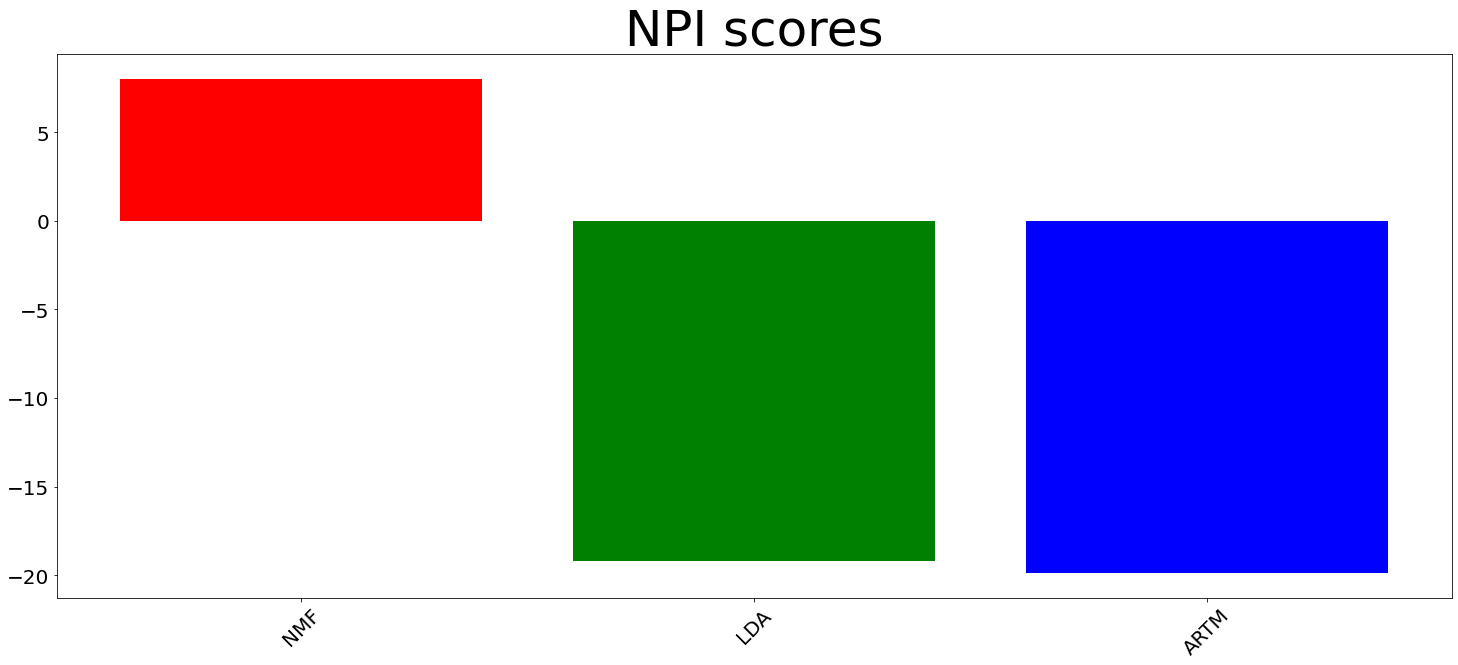

In [85]:
x = ['NMF', 'LDA', 'ARTM']
y = list(map(np.mean, [nmf_pmi, lda_pmi, artm_pmi]))
fig, ax = plt.subplots()
ax.bar(x, y, color=['r', 'g', 'b'])
fig.set_figwidth(25) 
fig.set_figheight(10)
plt.xticks(rotation=45, size=20)
plt.yticks(size=20)
plt.title('NPI scores', size=50)
plt.show()

#### Based on the distributed word representation 

In [86]:
print('NMF')
nmf_q=np.array([])
for i, topic in enumerate(nmf.components_):
    score = Q(words[topic.argsort()[-5:]])
    print('Topic {} Q: {}'.format(i+1, score))
    nmf_q = np.append(nmf_q, score)

NMF
Topic 1 Q: 0.849808570323512
Topic 2 Q: 0.9671069940552115
Topic 3 Q: 0.9540684485808015
Topic 4 Q: 0.9188200865872205
Topic 5 Q: 0.8646447269245983
Topic 6 Q: 0.8471600919961929
Topic 7 Q: 0.8202913224697113
Topic 8 Q: 0.8883377122692764
Topic 9 Q: 0.9104637691751123
Topic 10 Q: 0.8131222262978554
Topic 11 Q: 0.8756522135809064
Topic 12 Q: 0.8533778121694923
Topic 13 Q: 0.9063039567321539
Topic 14 Q: 0.9381876461207866
Topic 15 Q: 0.8224074434489012
Topic 16 Q: 0.6794901773333549
Topic 17 Q: 0.7872972169890999
Topic 18 Q: 0.7574046256020666
Topic 19 Q: 0.9000626191496849
Topic 20 Q: 0.8806169392075389
Topic 21 Q: 0.771488269791007
Topic 22 Q: 0.920639268308878
Topic 23 Q: 0.9597380761988461
Topic 24 Q: 0.8463316313922405
Topic 25 Q: 0.8622563767945394
Topic 26 Q: 0.9037200607941486
Topic 27 Q: 0.8547805139794946
Topic 28 Q: 0.9542913095792755
Topic 29 Q: 0.994265245180577
Topic 30 Q: 0.8270187132060528
Topic 31 Q: 0.8149224841967225
Topic 32 Q: 0.8980825389735401
Topic 33 Q: 0.848

In [87]:
print('LDA')
lda_q=np.array([])
for i, topic in enumerate(lda.components_):
    score=Q(words[topic.argsort()[-5:]])
    print('Topic {} Q: {}'.format(i+1, score))
    lda_q =np.append(lda_q, score)

LDA
Topic 1 Q: 0.8921463381654272
Topic 2 Q: 0.8921463381654272
Topic 3 Q: 0.8921463381654272
Topic 4 Q: 0.8921463381654272
Topic 5 Q: 0.8921463381654272
Topic 6 Q: 0.8921463381654272
Topic 7 Q: 0.8921463381654272
Topic 8 Q: 0.8921463381654272
Topic 9 Q: 0.8921463381654272
Topic 10 Q: 0.8921463381654272
Topic 11 Q: 0.8921463381654272
Topic 12 Q: 0.8921463381654272
Topic 13 Q: 0.8921463381654272
Topic 14 Q: 0.8921463381654272
Topic 15 Q: 0.8921463381654272
Topic 16 Q: 0.8921463381654272
Topic 17 Q: 0.8921463381654272
Topic 18 Q: 0.8921463381654272
Topic 19 Q: 0.8921463381654272
Topic 20 Q: 0.8921463381654272
Topic 21 Q: 0.8921463381654272
Topic 22 Q: 0.8921463381654272
Topic 23 Q: 0.8921463381654272
Topic 24 Q: 0.8921463381654272
Topic 25 Q: 0.8921463381654272
Topic 26 Q: 0.8921463381654272
Topic 27 Q: 0.8921463381654272
Topic 28 Q: 0.8921463381654272
Topic 29 Q: 0.8921463381654272
Topic 30 Q: 0.8921463381654272
Topic 31 Q: 0.8921463381654272
Topic 32 Q: 0.8921463381654272
Topic 33 Q: 0

In [88]:
print('ARTM')
i=0
artm_q=np.array([])
for topic_name in artm.topic_names:
    topic_key_words = artm.score_tracker['TopTokensScore'].last_tokens[topic_name]
    score=Q(topic_key_words)
    print('Topic {} Q: {}'.format(i+1, score))
    i+=1
    artm_q=np.append(artm_q, score)
    

ARTM
Topic 1 Q: 1.017955808589856
Topic 2 Q: 0.06704592717190584
Topic 3 Q: 0.06763274288839764
Topic 4 Q: 0.982813504524529
Topic 5 Q: 0.954848399075369
Topic 6 Q: 0.9274689491838217
Topic 7 Q: 0.9645903225988149
Topic 8 Q: 0.9906633941456675
Topic 9 Q: 0.9104934771545231
Topic 10 Q: 1.022667303145863
Topic 11 Q: 0.9743166185915471
Topic 12 Q: 0.9714848496951163
Topic 13 Q: 0.9681623872529599
Topic 14 Q: 1.0084392739925534
Topic 15 Q: 0.9296935426071287
Topic 16 Q: 0.9174245590344071
Topic 17 Q: 0.9036983698606491
Topic 18 Q: 0.9699011741729919
Topic 19 Q: 0.9546628832351416
Topic 20 Q: 0.9453707395121456
Topic 21 Q: 0.9779570261986615
Topic 22 Q: 0.9364648498594761
Topic 23 Q: 0.9336962582543492
Topic 24 Q: 0.9420515439065639
Topic 25 Q: 0.9618931604549289
Topic 26 Q: 0.9997498638404068
Topic 27 Q: 0.9051606931840069
Topic 28 Q: 0.9534134007059037
Topic 29 Q: 0.8862757096998394
Topic 30 Q: 0.8975291753187775
Topic 31 Q: 0.9618779508862645
Topic 32 Q: 0.9931121334433556
Topic 33 Q: 0.

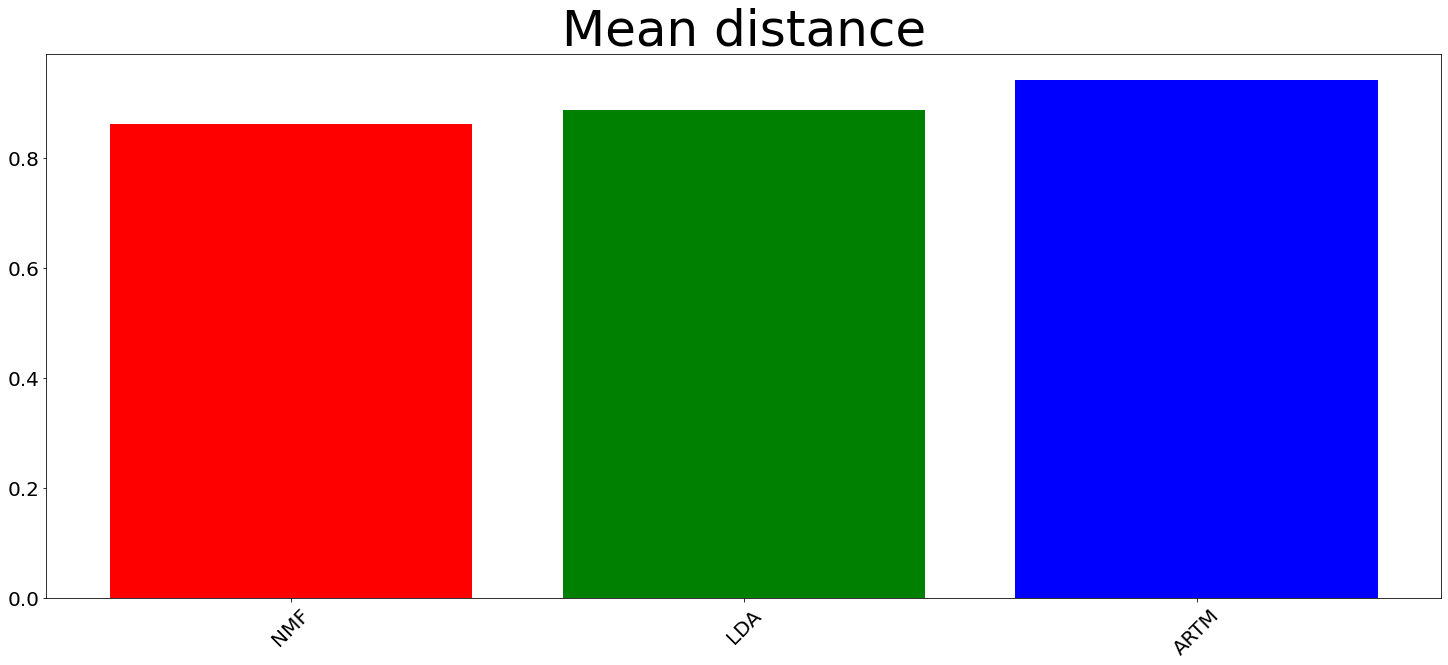

In [89]:
x = ['NMF', 'LDA', 'ARTM']
y = list(map(np.mean, [nmf_q, lda_q, artm_q]))
fig, ax = plt.subplots()
ax.bar(x, y, color=['r', 'g', 'b'])
fig.set_figwidth(25) 
fig.set_figheight(10)
plt.xticks(rotation=45, size=20)
plt.yticks(size=20)
plt.title('Mean distance', size=50)
plt.show()